In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [46]:
crypto_currency='ETH'
against_currency='USD'

In [47]:
start=dt.datetime(2016,1,1)

In [48]:
end=dt.datetime.now()

In [49]:
data=web.DataReader(f'{crypto_currency}-{against_currency}', 'yahoo',start, end)

#### prepare data

In [50]:
scaler =MinMaxScaler(feature_range=(0,1))

In [51]:
scaled_data=scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [52]:
prediction_days=60

In [ ]:
#future_days=30

In [53]:
x_train,y_train=[],[]

In [54]:
for x in range (prediction_days,len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x,0])

In [55]:
x_train, y_train=np.array(x_train),np.array(y_train)

In [56]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

#### Create Neural Network numpy 1.19.5

In [57]:
model=Sequential()

In [58]:
model.add(LSTM(units=50,return_sequences=True,input_shape=[x_train.shape[1],1]))

In [59]:
model.add(Dropout(0.2))

In [60]:
model.add(LSTM(units=50,return_sequences=True))

In [61]:
model.add(Dropout(0.2))

In [62]:
model.add(LSTM(units=50))

In [63]:
model.add(Dropout(0.2))

In [64]:
model.add(Dense(units=1))

In [65]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [66]:
model.fit(x_train,y_train, epochs=25,batch_size=32)

Epoch 1/25
61/61 [==============================] - 7s 43ms/step - loss: 0.0037
Epoch 2/25
61/61 [==============================] - 3s 42ms/step - loss: 0.0017
Epoch 3/25
61/61 [==============================] - 2s 40ms/step - loss: 0.0015
Epoch 4/25
61/61 [==============================] - 3s 41ms/step - loss: 0.0013
Epoch 5/25
61/61 [==============================] - 3s 42ms/step - loss: 0.0013
Epoch 6/25
61/61 [==============================] - 2s 40ms/step - loss: 0.0011
Epoch 7/25
61/61 [==============================] - 2s 40ms/step - loss: 0.0013
Epoch 8/25
61/61 [==============================] - 2s 40ms/step - loss: 0.0013
Epoch 9/25
61/61 [==============================] - 2s 40ms/step - loss: 9.6457e-04
Epoch 10/25
61/61 [==============================] - 2s 40ms/step - loss: 8.2093e-04
Epoch 11/25
61/61 [==============================] - 2s 40ms/step - loss: 9.3937e-04
Epoch 12/25
61/61 [==============================] - 2s 40ms/step - loss: 0.0010
Epoch 13/25
61/61 [======

#### Testing the data

In [67]:
test_start=dt.datetime(2020,1,1)

In [68]:
test_end=dt.datetime.now()

In [69]:
test_data=web.DataReader(f'{crypto_currency}-{against_currency}','yahoo',test_start,test_end)

In [70]:
actual_prices=test_data['Close'].values

In [71]:
total_datasets=pd.concat((data['Close'],test_data['Close']),axis=0)

In [72]:
model_inputs=total_datasets[len(total_datasets)-len(test_data)-prediction_days:].values

In [73]:
model_inputs=model_inputs.reshape(-1,1)

In [74]:
model_inputs=scaler.fit_transform(model_inputs)

In [75]:
x_test=[]

In [76]:
for x in range(prediction_days,len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

In [77]:
x_test=np.array(x_test)

In [78]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [79]:
prediction_prices=model.predict(x_test)

In [80]:
prediction_prices=scaler.inverse_transform(prediction_prices)

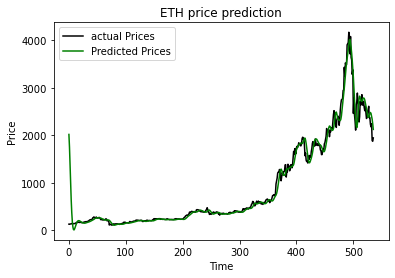

In [81]:
plt.plot(actual_prices,color='black',label="actual Prices")
plt.plot(prediction_prices, color='green',label='Predicted Prices')
plt.title(f'{crypto_currency} price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()

In [82]:
#### predicting next day

In [83]:
real_data=[model_inputs[len(model_inputs)+ 1- prediction_days:len(model_inputs+1),0]]

In [84]:
real_data=np.array(real_data)

In [85]:
real_data=np.reshape(real_data, (real_data.shape[0],real_data.shape[1],1))

In [86]:
prediction=model.predict(real_data)

In [87]:
prediction=scaler.inverse_transform(prediction)

In [88]:
print(f'Prediction:{prediction}')

Prediction:[[2017.8284]]
